In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
#issue 번호 지정(ex : 1,2,3,...)
issue_idx = 1

#파일 목록 가져오기
file_list = os.listdir("./data/issue"+str(issue_idx))
print("파일 목록 : ",file_list)

#issue idx 안에 들어있는 데이터 파일 경로 
FILE_PATH = "./data/issue"+str(issue_idx)+'/'

파일 목록 :  ['fake_comments_issue_1_trans - LIWC Analysis.csv', 'true_comments_issue_1_trans - LIWC Analysis.csv']


## Data 1. Negative Data

In [3]:
#데이터 불러오기
fake_1 = pd.read_csv(FILE_PATH + file_list[0])
true_1 = pd.read_csv(FILE_PATH + file_list[1])

In [4]:
#데이터 살펴보기
fake_1.head()

,ColumnID,Text,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
0,A,Koreans only do bad things when they come to K...,1,66,5.32,23.94,61.28,1.00,16.50,13.64,...,0.00,0.0,0.0,15.15,6.06,6.06,0.00,0.00,1.52,1.52
1,A,"If you look these days, you can see a lot of ...",1,73,15.16,25.32,97.30,1.00,14.60,20.55,...,0.00,0.0,0.0,17.81,9.59,5.48,0.00,0.00,1.37,1.37
2,A,Although the Korean-Chinese are superficially ...,1,68,42.31,66.03,57.19,1.00,22.67,25.00,...,0.00,0.0,0.0,10.29,4.41,4.41,0.00,0.00,0.00,1.47
3,A,"Yes, there are a lot of Korean-Chinese people...",1,62,24.16,31.06,95.40,1.00,12.40,16.13,...,1.61,0.0,0.0,25.81,8.06,8.06,0.00,0.00,6.45,3.23
4,A,Koreans should withdraw from Korea. All powerf...,1,53,91.90,92.68,1.24,5.02,8.83,22.64,...,0.00,0.0,0.0,26.42,5.66,7.55,1.89,5.66,0.00,5.66


## Preprocessing 1 : Removing Near Zero Variance features 

분산이 작은 feature를 제거하는 작업을 진행  
기준은 우선 사분위수를 이용함

In [5]:
#describe함수를 이용하여 통계량을 표현
sample_sta = fake_1.describe()

In [6]:
sample_sta.T.to_excel("sample.xlsx",encoding = 'utf8')

In [7]:
sample_sta

,Segment,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,...,assent,nonflu,filler,AllPunc,Period,Comma,QMark,Exclam,Apostro,OtherP
count,113.0,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,1.0,65.371681,48.397080,44.46823,51.363894,5.900088,16.327522,19.105044,90.690088,73.273894,...,0.038850,0.099558,0.038230,19.144513,7.416283,5.248053,0.482566,0.451681,1.948850,3.599204
std,0.0,17.190215,30.482668,30.79183,34.111948,12.652721,6.152351,5.893940,4.776511,6.054609,...,0.301039,0.434195,0.232806,6.543823,4.512775,2.781440,1.187047,1.467881,2.222214,2.174808
min,1.0,29.000000,1.000000,1.00000,1.000000,1.000000,6.330000,5.130000,75.000000,55.560000,...,0.000000,0.000000,0.000000,6.490000,1.520000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,57.000000,19.570000,16.05000,19.260000,1.000000,12.330000,14.810000,88.160000,69.700000,...,0.000000,0.000000,0.000000,14.710000,4.440000,3.230000,0.000000,0.000000,0.000000,1.750000
50%,1.0,65.000000,47.650000,40.06000,52.190000,1.000000,15.000000,18.280000,91.800000,73.580000,...,0.000000,0.000000,0.000000,18.180000,6.560000,4.920000,0.000000,0.000000,1.450000,3.230000
75%,1.0,73.000000,73.360000,66.03000,86.070000,5.020000,20.000000,22.410000,94.120000,76.740000,...,0.000000,0.000000,0.000000,23.080000,8.330000,6.900000,0.000000,0.000000,3.080000,5.410000
max,1.0,137.000000,99.000000,99.00000,99.000000,89.280000,40.000000,34.480000,100.000000,88.760000,...,2.780000,2.500000,1.520000,48.480000,30.910000,16.670000,6.900000,9.380000,8.330000,11.540000


In [8]:
sample_sta = sample_sta.T

In [9]:
sample_sta.head()

,count,mean,std,min,25%,50%,75%,max
Segment,113.0,1.000000,0.000000,1.0,1.00,1.00,1.00,1.0
WC,113.0,65.371681,17.190215,29.0,57.00,65.00,73.00,137.0
Analytic,113.0,48.397080,30.482668,1.0,19.57,47.65,73.36,99.0
Clout,113.0,44.468230,30.791830,1.0,16.05,40.06,66.03,99.0
Authentic,113.0,51.363894,34.111948,1.0,19.26,52.19,86.07,99.0


In [10]:
def get_feature_name(frame):
    feature_names = []
    #각 feature마다 rotation
    for idx in range(len(frame)):
        #하나의 feature에 대해
        feature = frame.iloc[idx]
        #std가 1이 이상이며, 2분위수의 값이 0인 아닌 경우
        if int(feature['std']) != 0 and int(feature['50%']) != 0 :
            feature_names.append(feature.name)
    return feature_names

In [11]:
remove_std = get_feature_name(sample_sta)
print("필터링 후 feature : ",get_feature_name(sample_sta))

필터링 후 feature :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'power', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'socrefs', 'Culture', 'ethnicity', 'Lifestyle', 'Physical', 'allure', 'Perception', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']


In [12]:
print("기존 feature의 갯수:",len(sample_sta))
print("전처리 후 feature 갯수:",len(remove_std))

기존 feature의 갯수: 118
전처리 후 feature 갯수: 58


In [13]:
#전처리 후 feature만 포함하는 dataframe
prepro = fake_1[remove_std]

In [14]:
prepro.describe()

,WC,Analytic,Clout,Authentic,Tone,WPS,BigWords,Dic,Linguistic,function,...,motion,space,time,focuspast,focuspresent,AllPunc,Period,Comma,Apostro,OtherP
count,113.000000,113.000000,113.00000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,...,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,65.371681,48.397080,44.46823,51.363894,5.900088,16.327522,19.105044,90.690088,73.273894,58.429115,...,1.692212,8.329735,2.384425,2.274956,7.544779,19.144513,7.416283,5.248053,1.948850,3.599204
std,17.190215,30.482668,30.79183,34.111948,12.652721,6.152351,5.893940,4.776511,6.054609,5.889625,...,1.739598,4.259858,2.464299,2.859402,2.902712,6.543823,4.512775,2.781440,2.222214,2.174808
min,29.000000,1.000000,1.00000,1.000000,1.000000,6.330000,5.130000,75.000000,55.560000,40.910000,...,0.000000,0.000000,0.000000,0.000000,0.000000,6.490000,1.520000,0.000000,0.000000,0.000000
25%,57.000000,19.570000,16.05000,19.260000,1.000000,12.330000,14.810000,88.160000,69.700000,54.840000,...,0.000000,5.190000,0.000000,0.000000,5.880000,14.710000,4.440000,3.230000,0.000000,1.750000
50%,65.000000,47.650000,40.06000,52.190000,1.000000,15.000000,18.280000,91.800000,73.580000,58.330000,...,1.450000,7.810000,1.610000,1.560000,7.690000,18.180000,6.560000,4.920000,1.450000,3.230000
75%,73.000000,73.360000,66.03000,86.070000,5.020000,20.000000,22.410000,94.120000,76.740000,62.320000,...,2.670000,10.910000,3.640000,3.610000,9.260000,23.080000,8.330000,6.900000,3.080000,5.410000
max,137.000000,99.000000,99.00000,99.000000,89.280000,40.000000,34.480000,100.000000,88.760000,75.470000,...,7.550000,23.530000,12.820000,15.490000,15.090000,48.480000,30.910000,16.670000,8.330000,11.540000


## 똑같이 postive에 대해서도 시행

In [15]:
true_1_sta = true_1.describe().T

In [16]:
true_remove_sta = get_feature_name(true_1_sta)
print(true_remove_sta)
print("feature 갯수: ",len(true_remove_sta))

['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'moral', 'socrefs', 'Culture', 'ethnicity', 'allure', 'Perception', 'space', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']
feature 갯수:  52


In [17]:
#negative와의 비교
print("negative : ",remove_std)
print("-"*50)
print("positive : ",true_remove_sta)
print("-"*50)
print("겹치는 항목 : ",set(remove_std).intersection(set(true_remove_sta)))
print("겹치는 항목 갯수 : ",len(set(remove_std).intersection(set(true_remove_sta))))
print("-"*50)
print("Negative - Positive : ",set(remove_std).difference(set(true_remove_sta)))
print("-"*50)
print("Positive - Negative : ",set(true_remove_sta).difference(set(remove_std)))

negative :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'they', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'power', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'tone_neg', 'emotion', 'emo_neg', 'emo_anger', 'Social', 'socbehav', 'socrefs', 'Culture', 'ethnicity', 'Lifestyle', 'Physical', 'allure', 'Perception', 'motion', 'space', 'time', 'focuspast', 'focuspresent', 'AllPunc', 'Period', 'Comma', 'Apostro', 'OtherP']
--------------------------------------------------
positive :  ['WC', 'Analytic', 'Clout', 'Authentic', 'Tone', 'WPS', 'BigWords', 'Dic', 'Linguistic', 'function', 'pronoun', 'ppron', 'i', 'ipron', 'det', 'article', 'prep', 'auxverb', 'adverb', 'conj', 'negate', 'verb', 'adj', 'quantity', 'Drives', 'Cognition', 'cogproc', 'insight', 'cause', 'discrep', 'tentat', 'differ', 'Affect', 'ton

In [18]:
#겹치는 항목 feature를 list로 저장
inter = list(set(remove_std).intersection(set(true_remove_sta)))

In [19]:
#negative와 positive의 feature를 intersection기준으로 맞추기
neg_inter = fake_1[inter]
pos_inter = true_1[inter]

## Preprocessing 2 : Feature Normalization

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
#sklearn에서 제공하는 MinMaxScaler를 이용해서 각각 Min-Max Normalization 수행하기
scaler = MinMaxScaler()
pos_inter = scaler.fit_transform(pos_inter)
neg_inter = scaler.fit_transform(neg_inter)

## PARAFAC2 decomposition 수행

In [22]:
import numpy.linalg as la
import matplotlib.pyplot as plt
import tensorly as tl
from tensorly.decomposition import parafac2
from scipy.optimize import linear_sum_assignment

In [23]:
#tensorly에서 제공하는 parafac2 클래스의 입력 형식에 맞게 텐서를 만들기
t = np.array([pos_inter,neg_inter])

C:\Users\Kaya\anaconda3\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  """Entry point for launching an IPython kernel.


In [24]:
#그래프를 그리기 위해 rank별 결과값 저장
rank_his = []
r2_ratio_his = []
r_error_his = []

#Rank를 바꿔가면서 R2_ratio와 R_error 살펴보기
for i in range(1,31):#1부터 30까지 Rank 값을 바꿔가면서 실험을 진행
    print("*"*100)
    print("RANK : ",i)
    true_rank = i
    best_err = np.inf
    decomposition = None

    for run in range(10):#각 rank마다 10회 반복하여 error가 가장 낮은 decomposition 결과값을 채택
        trial_decomposition, trial_errs = parafac2(t, rank = true_rank, return_errors=True, tol=1e-5, n_iter_max=500, random_state=run)
        if best_err > trial_errs[-1]:
            best_err = trial_errs[-1]
            err = trial_errs
            decomposition = trial_decomposition
    #decomposition의 결과를 이용하여 원래 값으로 변환
    est_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition)
    est_weights, (est_A, est_B, est_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition)
    
    #108값은 positive의 sentence갯수가 108개이기 떄문에 해당 값까지만 사용함
    #확인결과 108 이후 값은 모두 0임을 확인함
    first = est_tensor[0][:108]-t[0]
    second = est_tensor[1]-t[1]
    
    reconstruction_error = la.norm(np.concatenate([first,second],axis = 0))
    recovery_rate = 1 - (reconstruction_error/(la.norm(np.concatenate([t[0],t[1]],axis = 0))))
    #Test
    print(f'{recovery_rate:2.0%} of the data is explained by the model')

    #x - x^ 
    f = t[0] - est_tensor[0][:108]
    s = t[1] - est_tensor[1]
    t1 = np.concatenate([f,s],axis = 0)
    
    #R^2 ratio = ||X^||^2 / ||X||^2
    r2_ratio = (la.norm(np.concatenate([est_tensor[0][:108],est_tensor[1]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2))
    print("R^2 ratio : ", r2_ratio)
    
    #R_error = ||X-X^||
    r_error = (np.sum(f**2) + np.sum(s**2))**0.5
    print("R_error : ",r_error)
    
    rank_his.append(i)
    r2_ratio_his.append(r2_ratio)
    r_error_his.append(r_error)

****************************************************************************************************
RANK :  1
53% of the data is explained by the model
R^2 ratio :  0.7793143312681757
R_error :  22.151804381399668
****************************************************************************************************
RANK :  2
57% of the data is explained by the model
R^2 ratio :  0.8123357480973938
R_error :  20.42738705734991
****************************************************************************************************
RANK :  3
59% of the data is explained by the model
R^2 ratio :  0.8351648175718976
R_error :  19.14463093558297
****************************************************************************************************
RANK :  4
62% of the data is explained by the model
R^2 ratio :  0.8535447888373037
R_error :  18.04573006320828
****************************************************************************************************
RANK :  5
64% of the data is explained by 

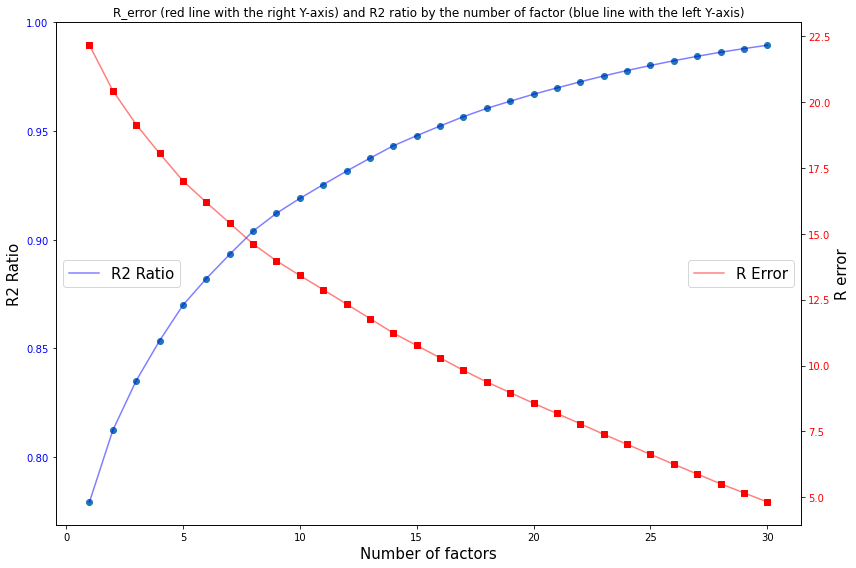

In [25]:
#그래프로 살펴본 뒤, 적절한 Rank값 설정하기
fig, ax1 = plt.subplots(figsize=(12,8))
ax1.set_title("R_error (red line with the right Y-axis) and R2 ratio by the number of factor (blue line with the left Y-axis)")
ax1.set_xlabel("Number of factors",fontsize = 15)
ax1.set_ylabel("R2 Ratio",fontsize=15)
ax1.scatter(rank_his,r2_ratio_his)
lns1 = ax1.plot(rank_his,r2_ratio_his,alpha = 0.5,color=  'blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.set_ylabel("R error",fontsize = 15)
ax2.scatter(rank_his,r_error_his,marker = 's',color = 'red')
lns2 = ax2.plot(rank_his,r_error_his,alpha = 0.5,color = 'red')
ax2.tick_params(axis = 'y',labelcolor = 'red')

ax1.legend(['R2 Ratio'],fontsize = 15,loc = 'center left')
ax2.legend(['R Error'],fontsize = 15,loc = 'center right')
fig.tight_layout()
plt.show()

In [26]:
#Decomposition의 결과를 이용하여 Reconstruction을 한 후 실제 값과 직접 비교해보기
#Reconstruction
est_tensor[0][:108]

array([[ 0.24424016, -0.00810139,  0.26812577, ...,  0.50495865,
         0.66384626,  0.34797218],
       [-0.07815869,  0.16348353,  0.16017655, ...,  0.2186139 ,
         0.37555268, -0.04358725],
       [ 0.29599005,  0.05166436,  0.17272419, ...,  0.2386417 ,
         0.54292432,  0.1461006 ],
       ...,
       [ 0.18569797,  0.04079103,  0.47228108, ...,  0.58015323,
         0.69135747,  0.45843703],
       [ 0.36257427, -0.01417707,  0.14624169, ...,  0.58676448,
         0.0868848 ,  0.18371936],
       [ 0.42692248,  0.03644379,  0.96512647, ...,  0.60724119,
         0.65917671,  0.46948481]])

In [27]:
#Real-Pos
pos_inter

array([[0.23844282, 0.        , 0.26468602, ..., 0.52673632, 0.74411135,
        0.30577223],
       [0.        , 0.03976608, 0.14989872, ..., 0.19729564, 0.28907923,
        0.        ],
       [0.27615572, 0.0374269 , 0.15327481, ..., 0.20405655, 0.4245182 ,
        0.17706708],
       ...,
       [0.18491484, 0.01038012, 0.51181634, ..., 0.5765212 , 0.66755889,
        0.47269891],
       [0.29683698, 0.        , 0.16475354, ..., 0.52427781, 0.08618844,
        0.19032761],
       [0.45012165, 0.06125731, 1.        , ..., 0.60725261, 0.68576017,
        0.43369735]])

In [28]:
#Reconstruction
est_tensor[1]

array([[ 0.32010897, -0.02233841,  0.47150352, ...,  0.87172011,
         0.20030332,  0.13170554],
       [ 0.54088187,  0.02359892,  0.32510715, ...,  0.57949645,
         0.36649038,  0.63400724],
       [ 0.00630948,  0.01781552,  0.25336384, ...,  0.43916601,
         0.65778265,  0.0913249 ],
       ...,
       [ 0.15456838,  0.07449965,  0.30559519, ...,  0.25857065,
         0.46109396,  0.11110644],
       [ 0.50055686,  0.04735752,  0.20977098, ...,  0.24157417,
         0.46421742,  0.17188713],
       [-0.01122431,  0.07391648,  0.47372556, ...,  0.11197639,
         0.70093838,  0.02620711]])

In [29]:
#Real-Neg
neg_inter

array([[0.31827731, 0.        , 0.47716535, ..., 0.89222615, 0.1605317 ,
        0.17423807],
       [0.57563025, 0.        , 0.32362205, ..., 0.5647821 , 0.40337423,
        0.63024727],
       [0.        , 0.        , 0.23149606, ..., 0.43286219, 0.6002045 ,
        0.08453134],
       ...,
       [0.17752101, 0.05595831, 0.26692913, ..., 0.2991755 , 0.46625767,
        0.09718229],
       [0.46008403, 0.07057091, 0.22992126, ..., 0.30094229, 0.59406953,
        0.12593445],
       [0.        , 0.00962845, 0.46299213, ..., 0.08657244, 0.6002045 ,
        0.08453134]])

## SELECT Optimal Rank r

In [30]:
#Select Optimal Rank r
#Suppose we choose optimal rank 7 (그래프를 보고 결정)
optimal_rank = 7

#Do parafac2 decomposition
decomposition_opt = parafac2(t,rank = optimal_rank,return_errors = False, tol = 1e-5,n_iter_max = 500,random_state = run)
estimated_tensor = tl.parafac2_tensor.parafac2_to_tensor(decomposition_opt)
setimated_weights,(e_A,e_B,e_C) = tl.parafac2_tensor.apply_parafac2_projections(decomposition_opt)

In [31]:
#Get R^2 ratio & R_error
#||X^||^2 / ||X||^2
print("R^2 ratio : ",round((la.norm(np.concatenate([estimated_tensor[0][:108],estimated_tensor[1]],axis = 0))**2/(la.norm(np.concatenate([t[0],t[1]],axis = 0))**2)),4))
#||X-X^||
print("R_error : ",round((np.sum((t[0]-estimated_tensor[0][:108])**2) + np.sum((t[1]-estimated_tensor[1])**2))**0.5,4))

R^2 ratio :  0.8933
R_error :  15.4042


## Calculate Euclidean Distance

In [32]:
def strength_dist(comp_B,comp_C):
    #변수는 논문 기준으로 작성
    result = []
    for idx_b in range(comp_B.shape[1]):
        one_feature = comp_B[:,idx_b]
        feature_distance = []
        for idx_c in range(comp_C.shape[1]):
            one_tensor = comp_C[:,idx_c]
            dist = la.norm(one_feature - one_tensor) #ED_str (논문 :수식 8참고)
            feature_distance.append(dist)
        result.append(feature_distance)
    result = np.array(result)
    return result

In [33]:
#논문에 나와있는 값으로 테스트(Figure 4)
#group
t_a = np.array([[0.7427,10.9210,1.1229],
      [1.7622,3.5415,2.8128]])
#feaature
t_b = np.array([[1.1825,1.2220,1.7247,1.0810],
      [4.5474,1.3056,0.8986,0.5292]])
print(strength_dist(t_b,t_a))

[[ 2.81970975  9.79031241  1.73562361]
 [ 0.66197587  9.95338384  1.51045445]
 [ 1.30771899  9.56853458  2.00657043]
 [ 1.27856791 10.29075076  2.28398436]]


## Result

In [34]:
#위에서 구현한 함수를 이용하여 distance를 구하기
final = strength_dist(e_C.T,e_A.T)

In [35]:
#make dataframe
#51개의 feature와 위에서 구한 distance를 positive와 negative로 나누어서 최종 결과물로 만들기
df = pd.DataFrame({"feature name" : inter,"Positive": final[:,0],"Negative" : final[:,1],"Difference":abs(final[:,0]-final[:,1])})

In [36]:
df.head()

,feature name,Positive,Negative,Difference
0,tentat,5.958697,6.329312,0.370614
1,Tone,3.132128,3.236350,0.104222
2,Culture,2.134139,2.200990,0.066850
3,auxverb,3.013469,3.279080,0.265611
4,pronoun,2.746691,2.931163,0.184473


In [37]:
#엑셀 파일로 저장하기
df.to_excel('final_test_1.xlsx',encoding ='utf8')